# Data Visualization in R

## Table of Contents

- [Introduction](#into)
- [Creating Visualizations with ggplot2](#ggplot2)
- [Maps](#maps)
- [Resources](#res)

---
<a id='into'></a>

## Introduction

The purpose of visualization is insight, not pictures. The ability to create visualizations (graphical representations) of data is a key step in being able to communicate information and findings to others.

Steps in the data visualization process:

1. Understanding the **purpose** of visualization
2. Selecting a **visual layout** based on your question and data type
3. Choosing optimal **graphical encodings** for your variables
4. Identifying visualizations that are able to **express** your data
5. Improving the **aesthetics** (i.e., making it readable and informative)

---
<a id='ggplot2'></a>

## Creating Visualizations with ggplot2

**[ggplot2](https://ggplot2.tidyverse.org/)**

In [1]:
install.packages("ggplot2") # once per machine 
library("ggplot2") # in each relevant script


The downloaded binary packages are in
	/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T//RtmpVihjUW/downloaded_packages


In [2]:
?midwest

midwest {ggplot2},R Documentation


In [4]:
is.data.frame(midwest)

[1] TRUE

In [7]:
?qplot

qplot {ggplot2},R Documentation
"x, y, ...",Aesthetics passed into each layer
data,"Data frame to use (optional). If not specified, will create one, extracting vectors from the current environment."
facets,faceting formula to use. Picks facet_wrap() or facet_grid() depending on whether the formula is one- or two-sided
margins,See facet_grid: display marginal facets?
geom,"Character vector specifying geom(s) to draw. Defaults to ""point"" if x and y are specified, and ""histogram"" if only x is specified."
"xlim, ylim",X and y axis limits
log,"Which variables to log transform (""x"", ""y"", or ""xy"")"
"main, xlab, ylab","Character vector (or expression) giving plot title, x axis label, and y axis label respectively."
asp,The y/x aspect ratio
"stat, position",DEPRECATED.


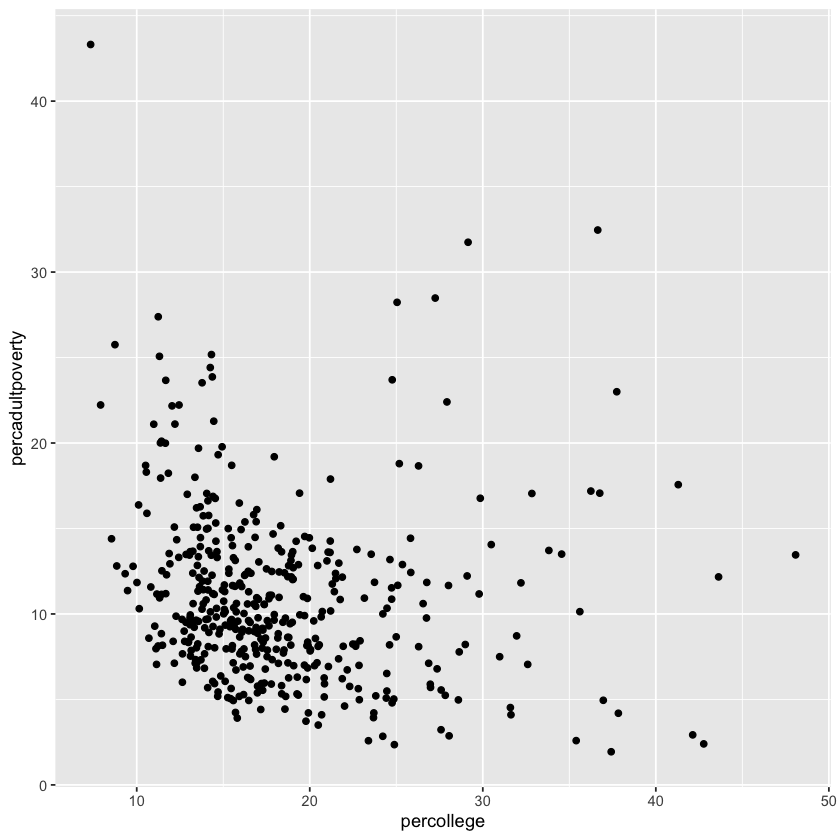

In [8]:
qplot(x = percollege, y = percadultpoverty, data = midwest)

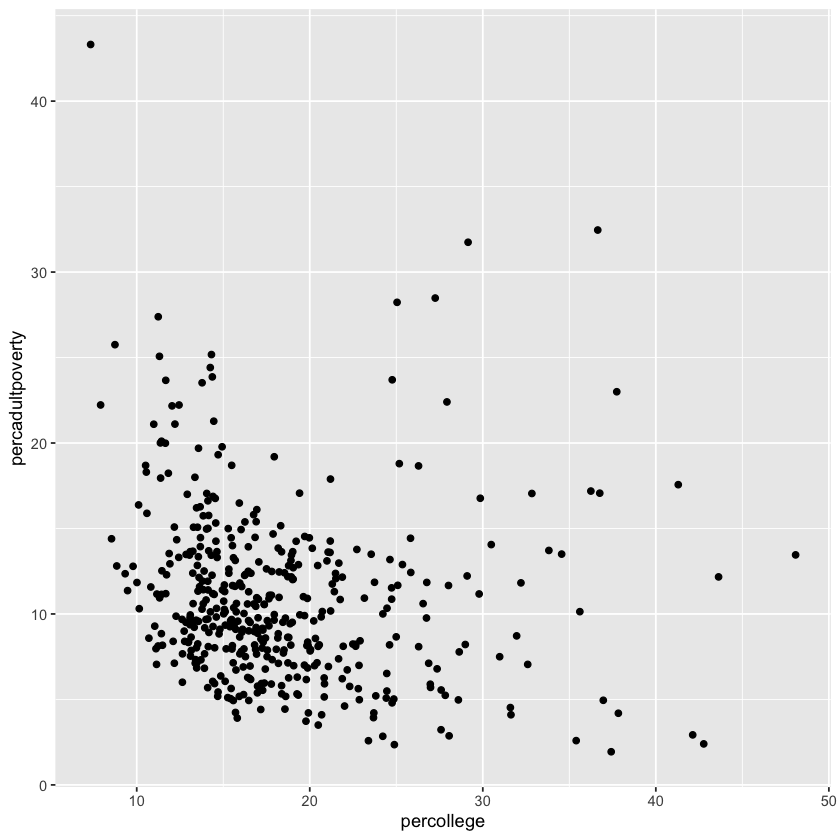

In [3]:
# Plot the `midwest` data set, with college education rate on the x-axis a 
# percentage of adult poverty on the y-axis
ggplot(data = midwest) +
    geom_point(mapping = aes(x = percollege, y = percadultpoverty))

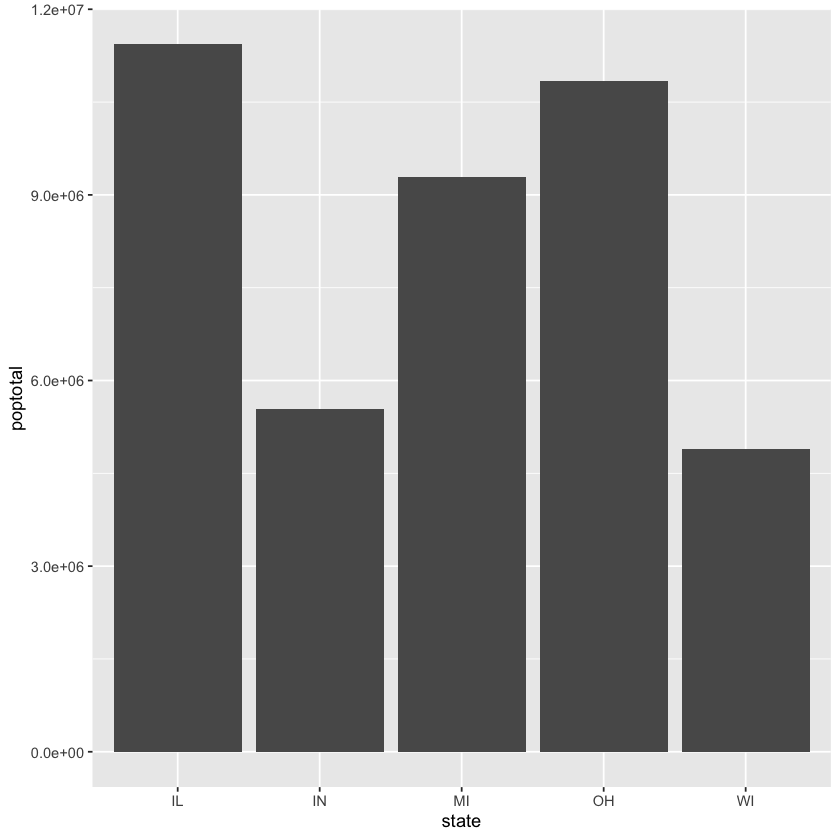

In [9]:
# A bar chart of the total population of each state
# The `state` is mapped to the x-axis, and the `poptotal` is mapped to the y-axis
ggplot(data = midwest) +
    geom_col(mapping = aes(x = state, y = poptotal))

In [13]:
install.packages("hexbin")
library("hexbin")


The downloaded binary packages are in
	/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T//RtmpVihjUW/downloaded_packages


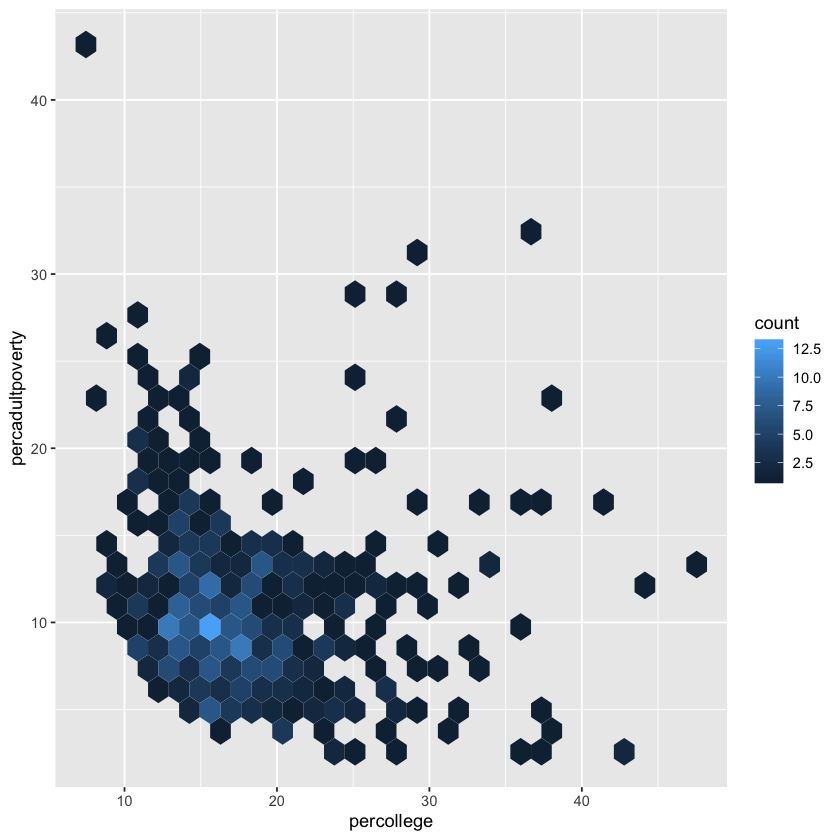

In [14]:
# A hexagonal aggregation that counts the co-occurrence of college education rate
# and percentage of adult poverty
ggplot(data = midwest) +
    geom_hex(mapping = aes(x = percollege, y = percadultpoverty))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



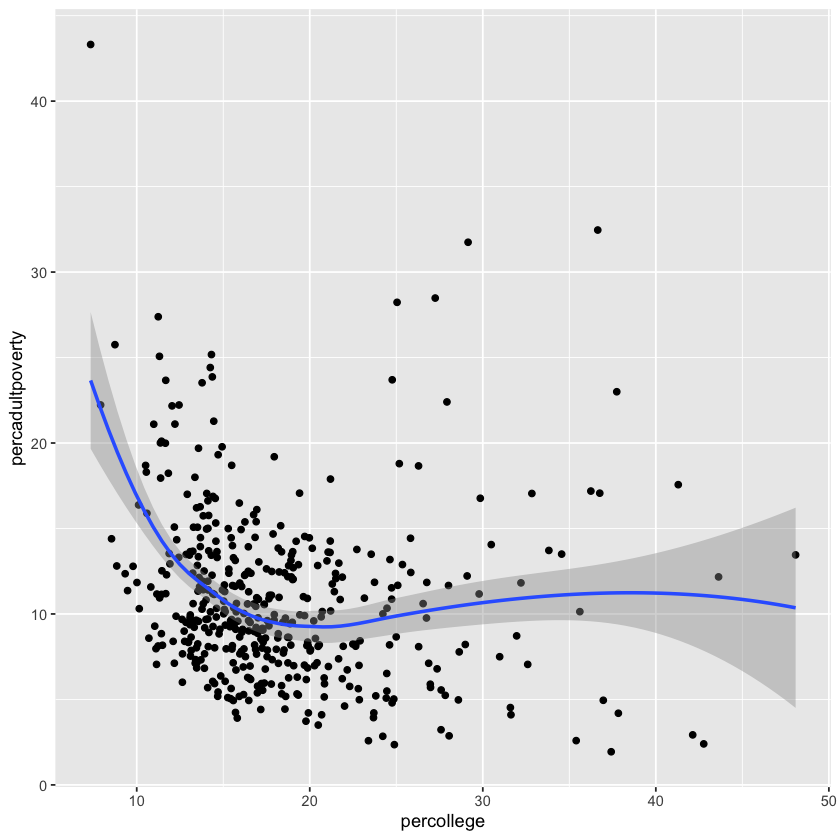

In [15]:
# A plot with both points and a smoothed line
ggplot(data = midwest) +
    geom_point(mapping = aes(x = percollege, y = percadultpoverty)) + 
    geom_smooth(mapping = aes(x = percollege, y = percadultpoverty))

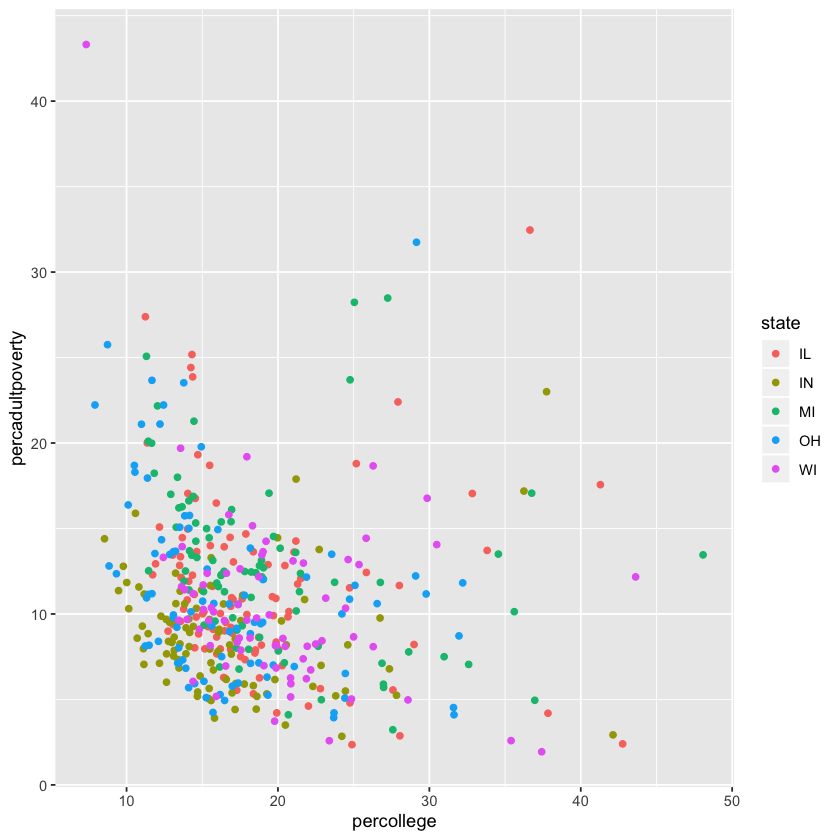

In [19]:
# Change the color of each point based on the state it is in
ggplot(data = midwest) +
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty, color = state)
    )

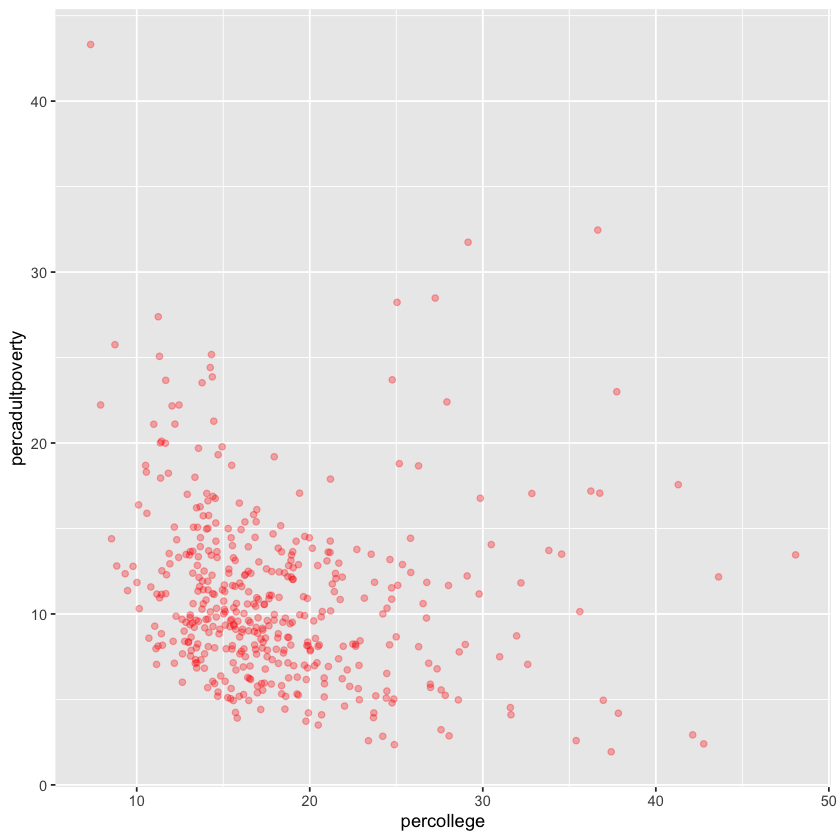

In [20]:
# Create a scatterplot of the `midwest` data, specifying visual properties 
# for *all points* (not driven by data)
ggplot(data = midwest) +
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty), 
        color = "red",
        alpha = .3
    )


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




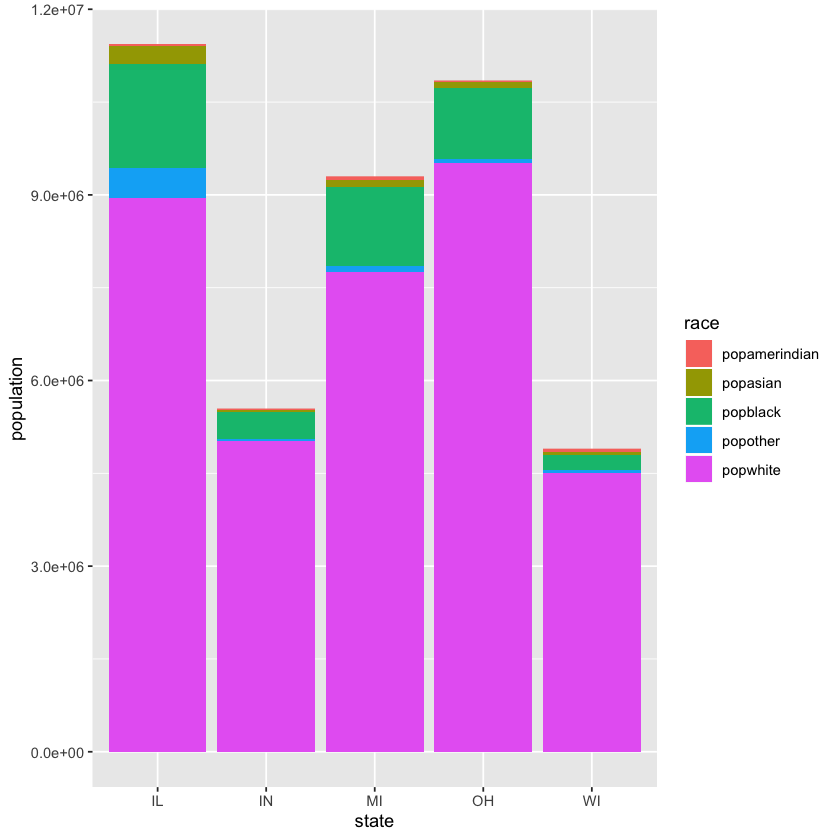

In [22]:
# Load the `dplyr` and `tidyr` libraries for data manipulation
library("dplyr") 
library("tidyr")

# Rearrange the orientation of your data using `tidyr` and `dplyr` -- a common step! 
# Select the columns for racial population totals, then
# `gather()` those column values into `race` and `population` columns 
state_race_long <- midwest %>%
    select(state, popwhite, popblack, popamerindian, popasian, popother) %>% 
    gather(key = race, value = population, -state) # gather all columns exc

# Create a stacked bar chart of the number of people in each state
# Fill the bars using different colors to show racial composition 
ggplot(state_race_long) +
    geom_col(mapping = aes(x = state, y = population, fill = race))

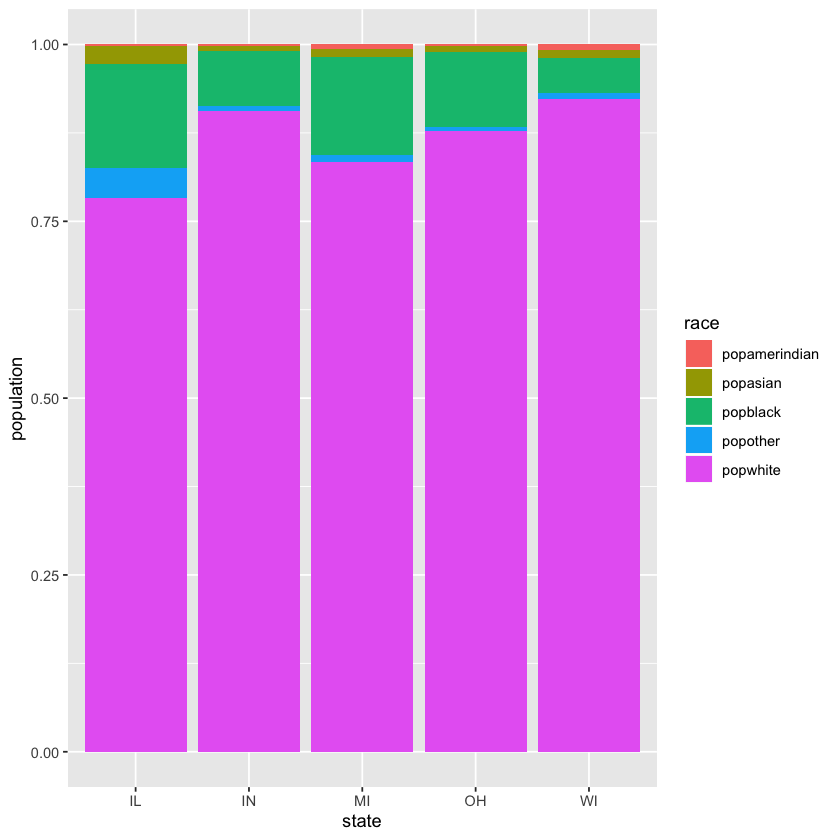

In [24]:
# Create a percentage (filled) stacked column of the population (by race) in each state
ggplot(state_race_long) +
    geom_col(
        mapping = aes(x = state, y = population, fill = race), position = "fill"
    )

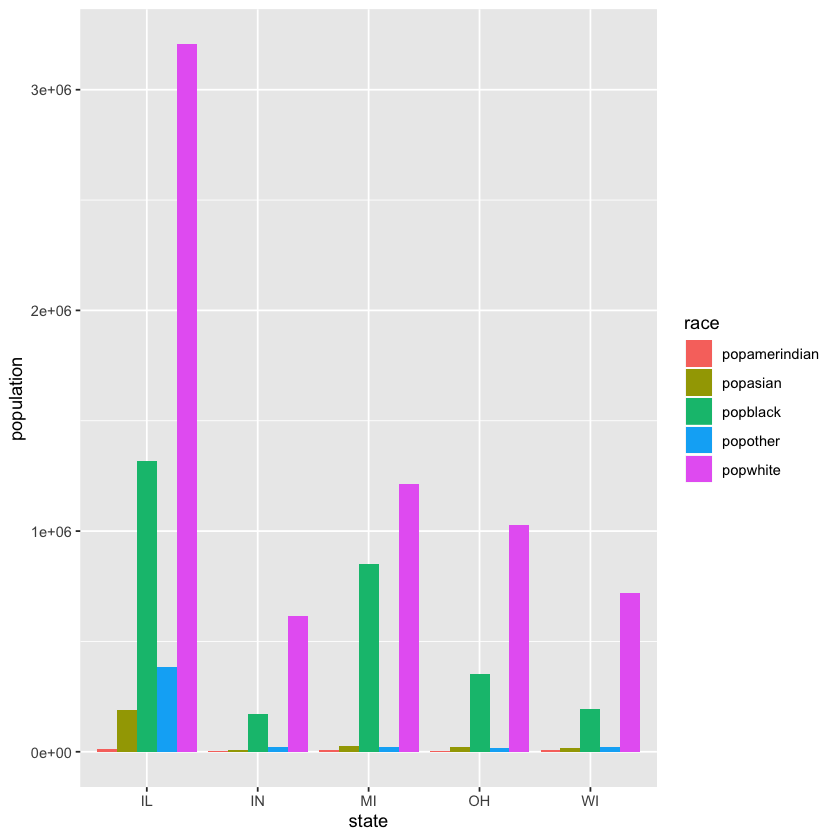

In [25]:
# Create a grouped (dodged) column of the number of people (by race) in eaach state
ggplot(state_race_long) +
    geom_col(
        mapping = aes(x = state, y = population, fill = race), position = "dodge"
    )

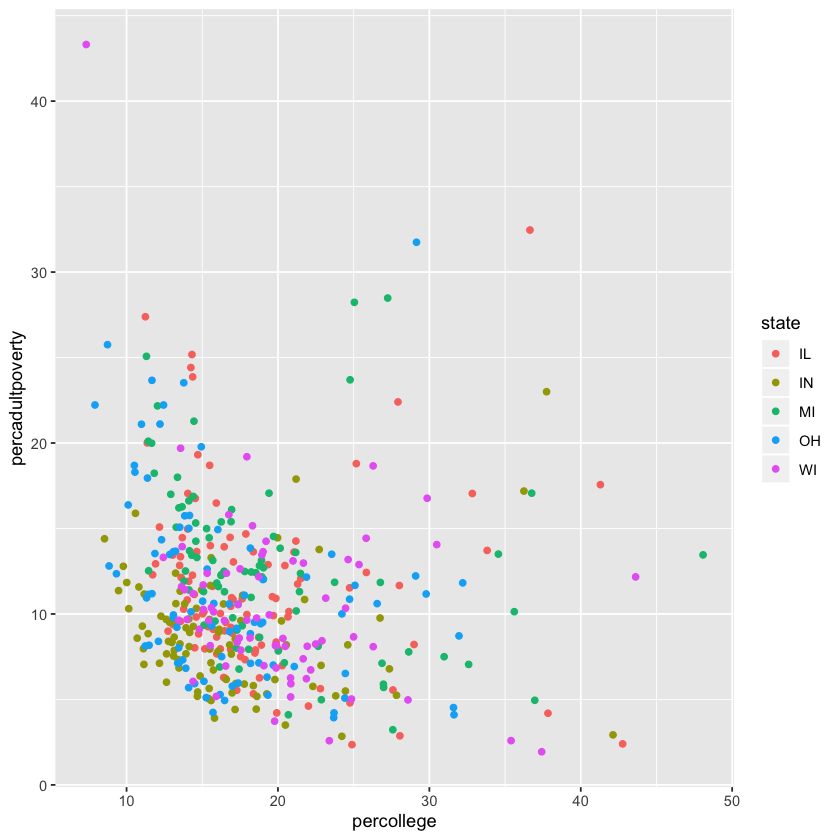

In [26]:
# Plot the `midwest` data set, with college education rate on the x-axis and 
# percentage of adult poverty on the y-axis. Color by state.
ggplot(data = midwest) +
    geom_point(mapping = aes(x = percollege, y = percadultpoverty, color = state))

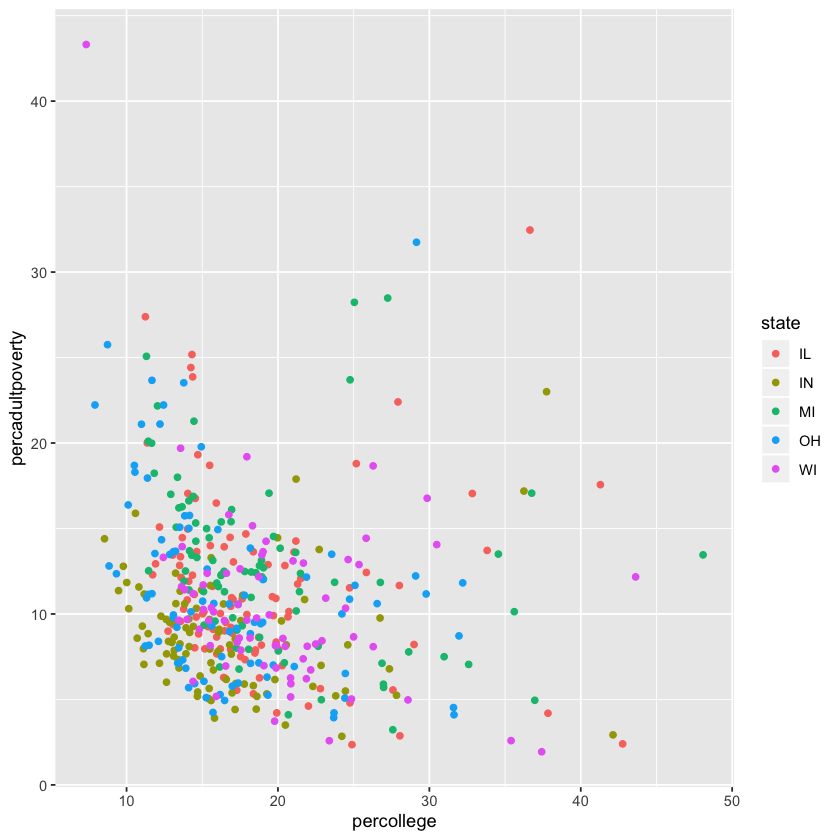

In [27]:
# Plot the `midwest` data set, with college education rate and 
# percentage of adult poverty. Explicitly set the scales. 
ggplot(data = midwest) +
    geom_point(mapping = aes(x = percollege, y = percadultpoverty, color = state)) + 
    scale_x_continuous() + # explicitly set a continuous scale for the x-axis 
    scale_y_continuous() + # explicitly set a continuous scale for the y-axis 
    scale_color_discrete() # explicitly set a discrete scale for the color aesthetic

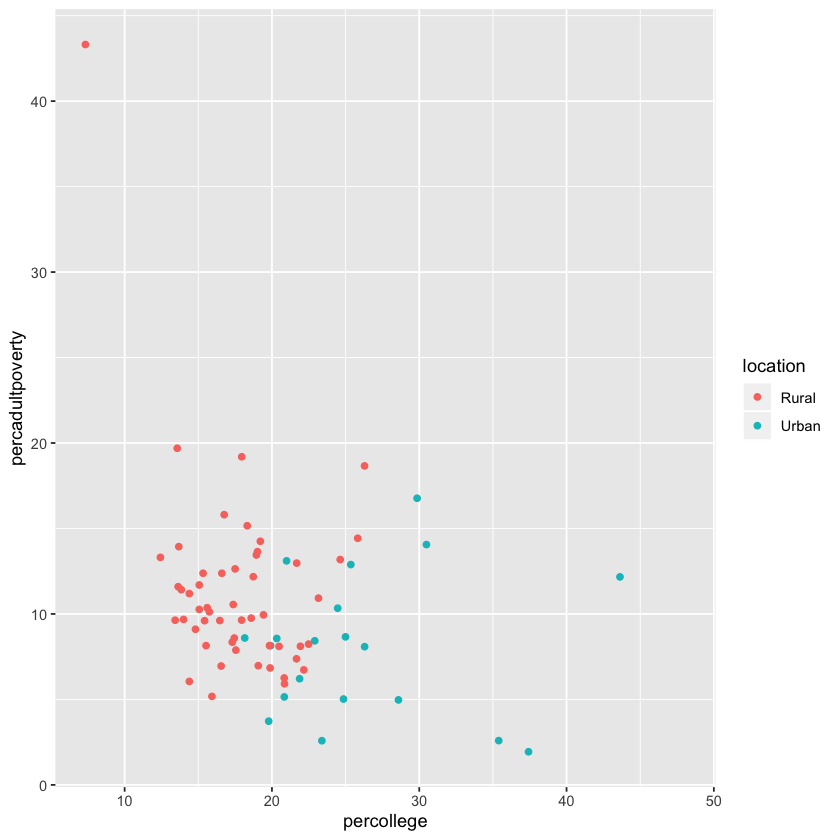

In [31]:
# Create a better label for "inmetro" column
labeled <- midwest %>%
    mutate(location = if_else(inmetro == 0, "Rural", "Urban"))

# Subset data by state
wisconsin <- labeled %>% filter(state == "WI") # Wisconsin 
michigan <- labeled %>% filter(state == "MI") # Michigan

# Define continuous scales based on the entire data set:
# range() produces a (min, max) vector to use as the limits
x_scale <- scale_x_continuous(limits = range(labeled$percollege)) 
y_scale <- scale_y_continuous(limits = range(labeled$percadultpoverty))

# Define a discrete color scale using the unique set of locations (urban/rural)
color_scale <- scale_color_discrete(limits = unique(labeled$location))

# Plot the Wisconsin data, explicitly setting the scales
ggplot(data = wisconsin) +
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty, color = location)
    ) +
    x_scale +
    y_scale +
    color_scale

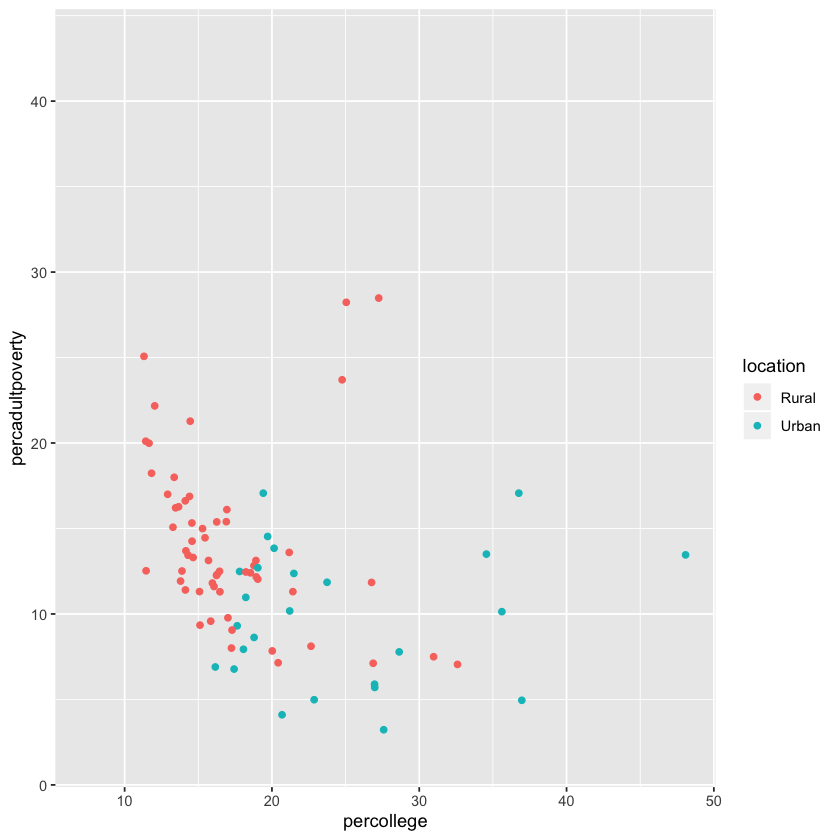

In [33]:
# Plot the Michigan data using the same scales
ggplot(data = michigan) +
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty, color = location)
    ) +
    x_scale +
    y_scale +
    color_scale

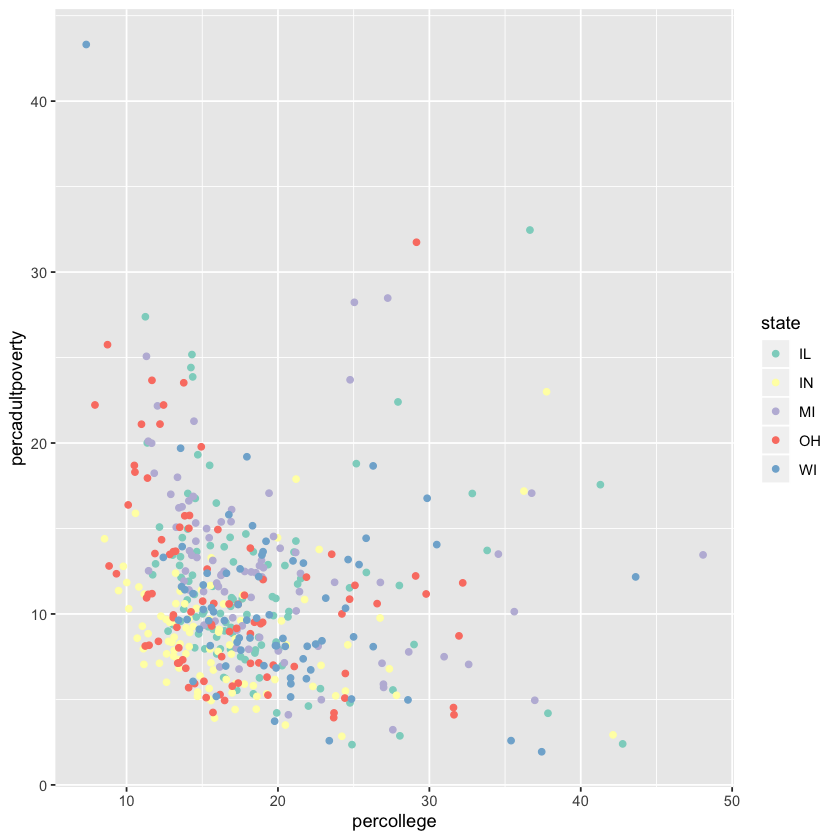

In [34]:
# Change the color of each point based on the state it is in
ggplot(data = midwest) +
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty, color = state)
    ) +
    scale_color_brewer(palette = "Set3") # use the "Set3" color palette for color scale

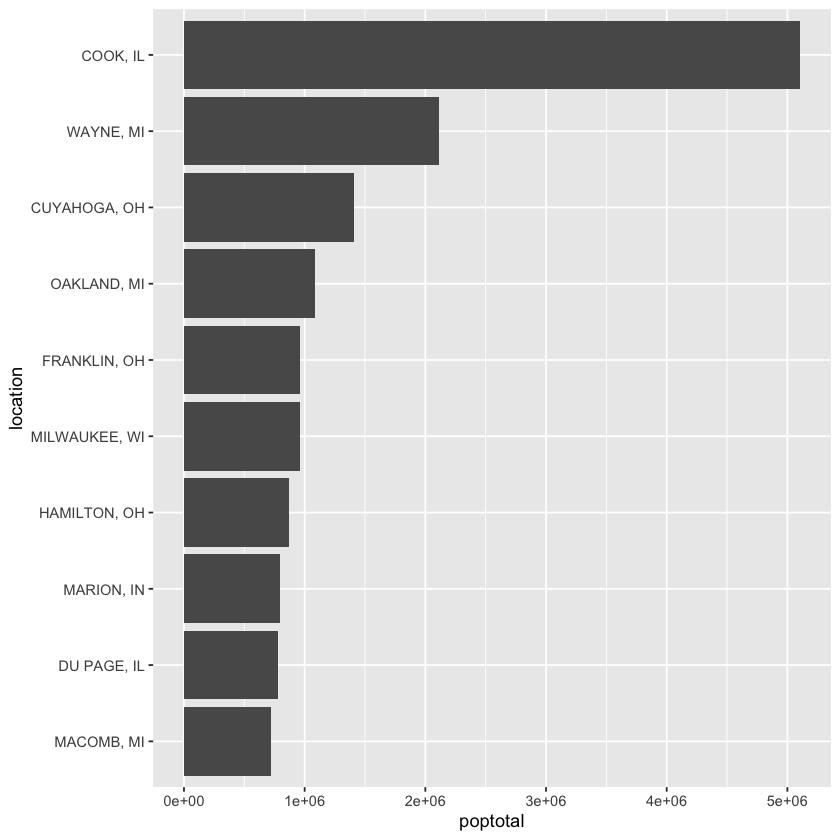

In [35]:
# Create a horizontal bar chart of the most populous counties
# Thoughtful use of `tidyr` and `dplyr` is required for wrangling before visualizing

# Filter down to top 10 most populous counties
top_10 <- midwest %>%
    top_n(10, wt = poptotal) %>%
    unite(county_state, county, state, sep = ", ") %>% # combine state + county 
    arrange(poptotal) %>% # sort the data by population
    mutate(location = factor(county_state, county_state)) # set the row order

# Render a horizontal bar chart of population
ggplot(top_10) +
    geom_col(mapping = aes(x = location, y = poptotal)) + 
    coord_flip() # switch the orientation of the x- and y-axes

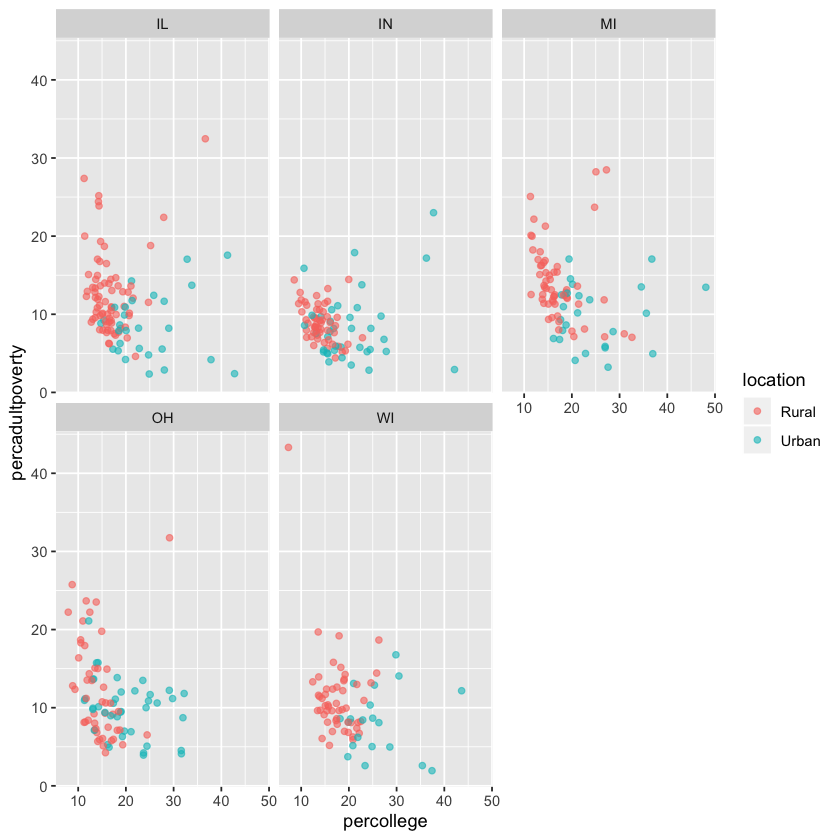

In [36]:
# Create a better label for "inmetro" column
labeled <- midwest %>%
    mutate(location = if_else(inmetro == 0, "Rural", "Urban"))

# Create the same chart as before, faceted by state
ggplot(data = labeled) + 
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty, color = location), 
        alpha = .6
    ) +
    x_scale +
    y_scale +
    color_scale +
    facet_wrap(~state) # pass the `state` column as a *fomula* to `facet_wrap()

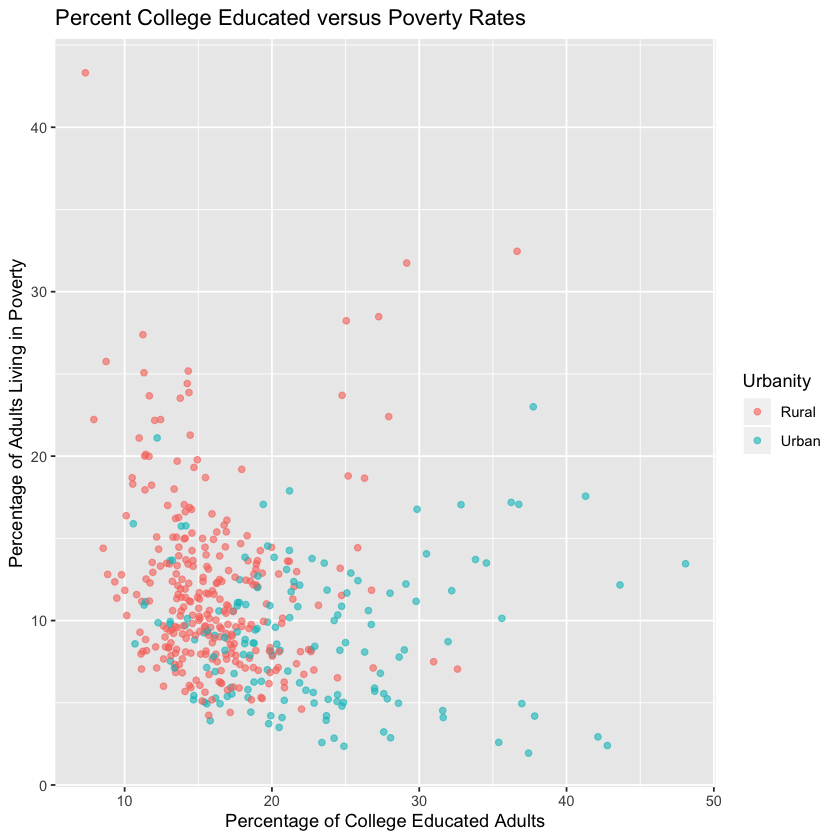

In [37]:
# Adding better labels to the plot
ggplot(data = labeled) + 
    geom_point(
        mapping = aes(x = percollege, y = percadultpoverty, color = location),
        alpha = .6 
    ) +
    x_scale + # add x scale
    y_scale + # add y scale 
    color_scale + # add color scale

# Add title and axis labels
labs(
    title = "Percent College Educated versus Poverty Rates", # plot title 
    x = "Percentage of College Educated Adults", # x-axis label
    y = "Percentage of Adults Living in Poverty", # y-axis label
    color = "Urbanity" # legend label for the "color" property
)

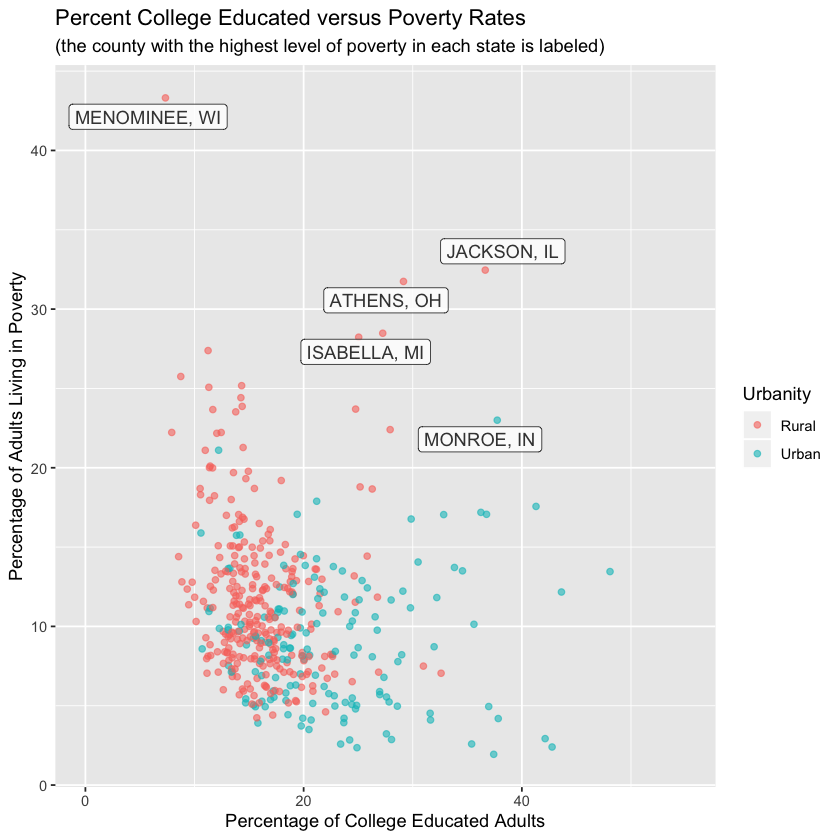

In [47]:
# Load the `ggrepel` package: functions that prevent labels from overlapping
library(ggrepel)

# Find the highest level of poverty in each state
most_poverty <- midwest %>%
    group_by(state) %>% # group by state
    top_n(1, wt = percadultpoverty) %>% # select the highest poverty county 
    unite(county_state, county, state, sep = ", ") # for clear labeling

# Store the subtitle in a variable for cleaner graphing code
subtitle <- "(the county with the highest level of poverty in each state is labeled)"

# Plot the data with labels
ggplot(data = labeled, mapping = aes(x = percollege, y = percadultpoverty)) +
       
    # add the point geometry
    geom_point(
        mapping = aes(color = location), 
        alpha = .6) +

    # add the label geometry
    geom_label_repel(
        data = most_poverty, # uses its own specified data set
        mapping = aes(label = county_state),
        alpha = 0.8) +

    # set the scale for the axis
    scale_x_continuous(limits = c(0, 55)) +

    # add title and axis labels
    labs(
        title = "Percent College Educated versus Poverty Rates", # plot title 
        subtitle = subtitle,
        x = "Percentage of College Educated Adults", # x-axis label
        y = "Percentage of Adults Living in Poverty", # y-axis label
        color = "Urbanity" # legend label for the "color" property
    )

---
<a id='maps'></a>

## Maps

- **Choropleth maps**: Maps in which different geographic areas are shaded based on data about each region. These maps can be used to visualize data that is aggregated to specified geographic areas. For example, you could show the eviction rate in each state using a choropleth map. Choropleth maps are also called **heatmaps**.

- **Dot distribution maps**: Maps in which markers are placed at specific coordinates. These plots can be used to visualize observations that occur at discrete (latitude/longitude) points. For example, you could show the specific address of each eviction notice filed in a given city.

Shapefiles:
- [U.S. Census: Cartographic Boundary Shapefiles](https://www.census.gov/geo/maps-data/data/tiger-cart-boundary.html)
- [OpenStreetMap: Shapefiles](https://wiki.openstreetmap.org/wiki/Shapefiles)

In [53]:
install.packages("maps")
install.packages("mapproj")
library("maps")
library("mapproj")


The downloaded binary packages are in
	/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T//RtmpVihjUW/downloaded_packages

The downloaded binary packages are in
	/var/folders/qk/0l3zx9w11959pqp8tr5s_1780000gn/T//RtmpVihjUW/downloaded_packages


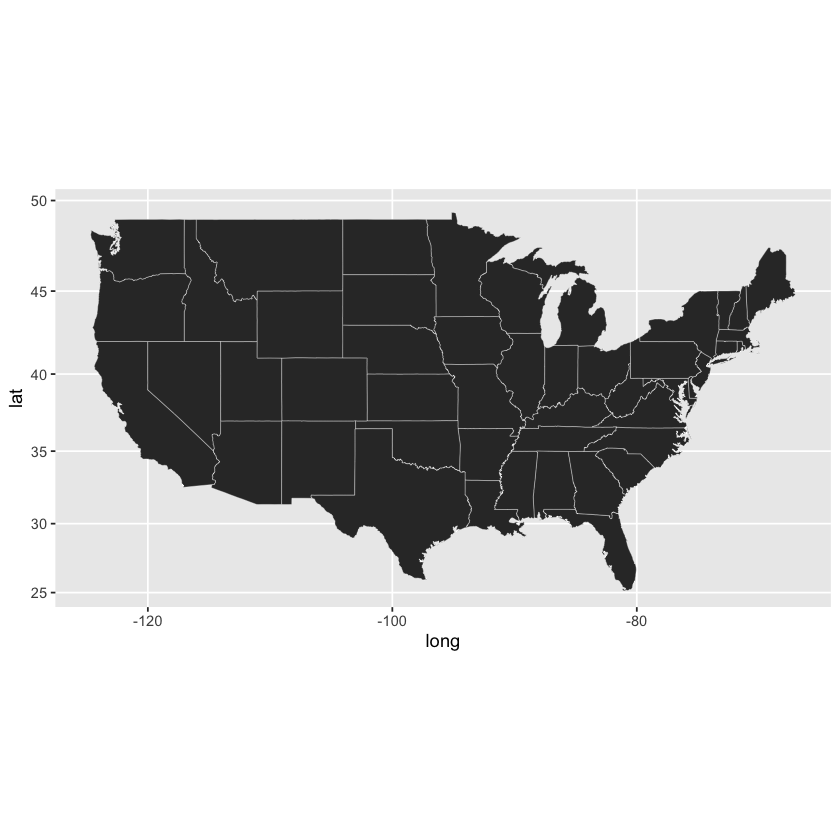

In [56]:
# Load a shapefile of U.S. states using ggplot's `map_data()` function
state_shape <- map_data("state") # "world"

# Create a blank map of U.S. states
ggplot(state_shape) + 
    geom_polygon(
        mapping = aes(x = long, y = lat, group = group), 
        color = "white", # show state outlines
        size = .1 # thinly stroked
    ) +
    coord_map() # use a map-based coordinate system

In [67]:
# !!! For working example (data) see R Case Study

# Define a minimalist theme for maps
blank_theme <- theme_bw() + 
    theme(
        axis.line = element_blank(), # remove axis lines
        axis.text = element_blank(), # remove axis labels
        axis.ticks = element_blank(), # remove axis ticks
        axis.title = element_blank(), # remove axis titles
        plot.background = element_blank(), # remove gray background
        panel.grid.major = element_blank(), # remove major grid lines
        panel.grid.minor = element_blank(), # remove minor grid lines
        panel.border = element_blank()# remove border around plot
    )

# Load evictions data
evictions <- read.csv("data/r/states.csv", stringsAsFactors = F) %>% 
    filter(year == 2016) %>% # keep only 2016 data
    mutate(state = tolower(State)) # replace with lowercase for joining

# Join data
state_shape <- map_data("state") %>% # load state shapefile
    rename(state = region) %>% # rename for joining 
    left_join(evictions, by="state") # join eviction data

# Draw the map
ggplot(state_shape) + 
    geom_polygon(
        mapping = aes(x = long, y = lat, group = group, fill = eviction.rate), 
        color = "white", # show state outlines
        size = .1 # thinly stroked
    ) +
    coord_map() + # use a map-based coordinate system 
    scale_fill_continuous(low = "#132B43", high = "Red") +
    labs(fill = "Eviction Rate") +
    blank_theme # variable containing map styles (defined in next code snippet)

ERROR: Error: object 'year' not found


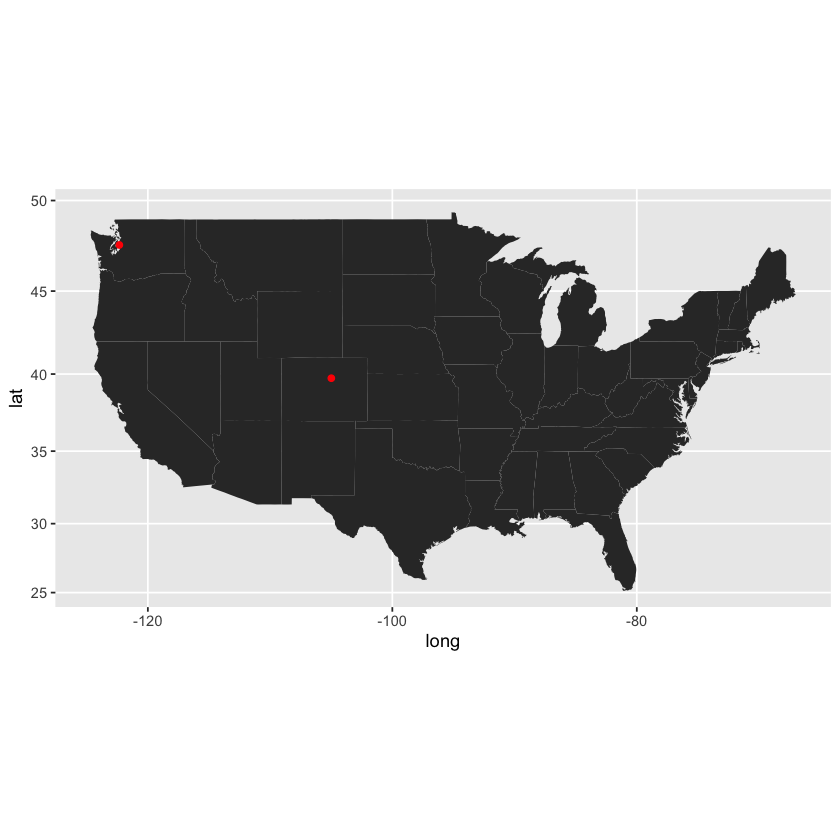

In [68]:
# Create a data frame of city coordinates to display
cities <- data.frame(
    city = c("Seattle", "Denver"), 
    lat = c(47.6062, 39.7392), 
    long = c(-122.3321, -104.9903)
)

# Draw the state outlines, then plot the city points on the map
ggplot(state_shape) +
    geom_polygon(mapping = aes(x = long, y = lat, group = group)) +
    geom_point(
        data = cities, # plots own data set
        mapping = aes(x = long, y = lat), # points will be drawn at given coo 
        color = "red"
    ) +
    coord_map() # use a map-based coordinate system

---
<a id='res'></a>

## Resources

- [Making Maps with R](http://eriqande.github.io/2014/12/24/plotting-sst-with-ggplot.html)
- [Plotting SST with ggplot](http://eriqande.github.io/2014/12/24/plotting-sst-with-ggplot.html)